In [1]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns  # For distribution plot

In [2]:
colors = ['red', 'green','orange', 'purple']
n_sects = 3
asset_name = 'AMD'

In [3]:
def plat_regimes(asset_n, data, h_states, title, n_components, return_flag=False, dist_flag=False):
    
    # Plot the actual S&P 500 chart
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.plot(data.index, data['Close'], label=title)
    
    # Color the regimes
    
    for i in range(n_components):
        idx = (h_states == i)
        plt.plot(data.index[idx], data['Close'][idx], '.', label=f'Regime {i}', color=colors[i])
    
    plt.legend()

    if return_flag:
        plt.subplot(2, 1, 2)
        plt.plot(data.index, data['Returns'], label='Returns of {}'.format(asset_n))
        plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot the distribution of returns
    if dist_flag:
        sns.distplot(data['Returns'], bins=50, kde=True)
        plt.title('Distribution of {} Returns'.format(asset_n))
        plt.xlabel('Returns')
        plt.ylabel('Density')
        plt.show()
    

In [4]:
# Fetch S&P 500 index data from Yahoo Finance
data = yf.download(asset_name, start='2020-01-01', end='2024-01-01')
data['Returns'] = data['Close'].pct_change()

# Drop any NaNs from the DataFrame
data.dropna(inplace=True)
print('date size: ', data.shape)

# Extract the returns as a NumPy array
returns = data['Returns'].values
print('daily returns: {}, size: {}'.format(type(returns), returns.shape))
# Standardize the returns
scaler = StandardScaler()
returns = scaler.fit_transform(returns.reshape(-1, 1))

# Create and train the Hidden Markov Model
model = hmm.GaussianHMM(n_components=n_sects, covariance_type="full", n_iter=100)
model.fit(returns)

# Predict the hidden states (regimes)
hidden_states = model.predict(returns)
print(' hidden_states: {}, size: {}'.format(type(hidden_states), hidden_states.shape))

[*********************100%%**********************]  1 of 1 completed
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


date size:  (1005, 7)
daily returns: <class 'numpy.ndarray'>, size: (1005,)
 hidden_states: <class 'numpy.ndarray'>, size: (1005,)


In [5]:
# Print the detected regimes
# for i in range(len(data)):
#     print(f"Date: {data.index[i].date()}, Regime: {hidden_states[i]}")

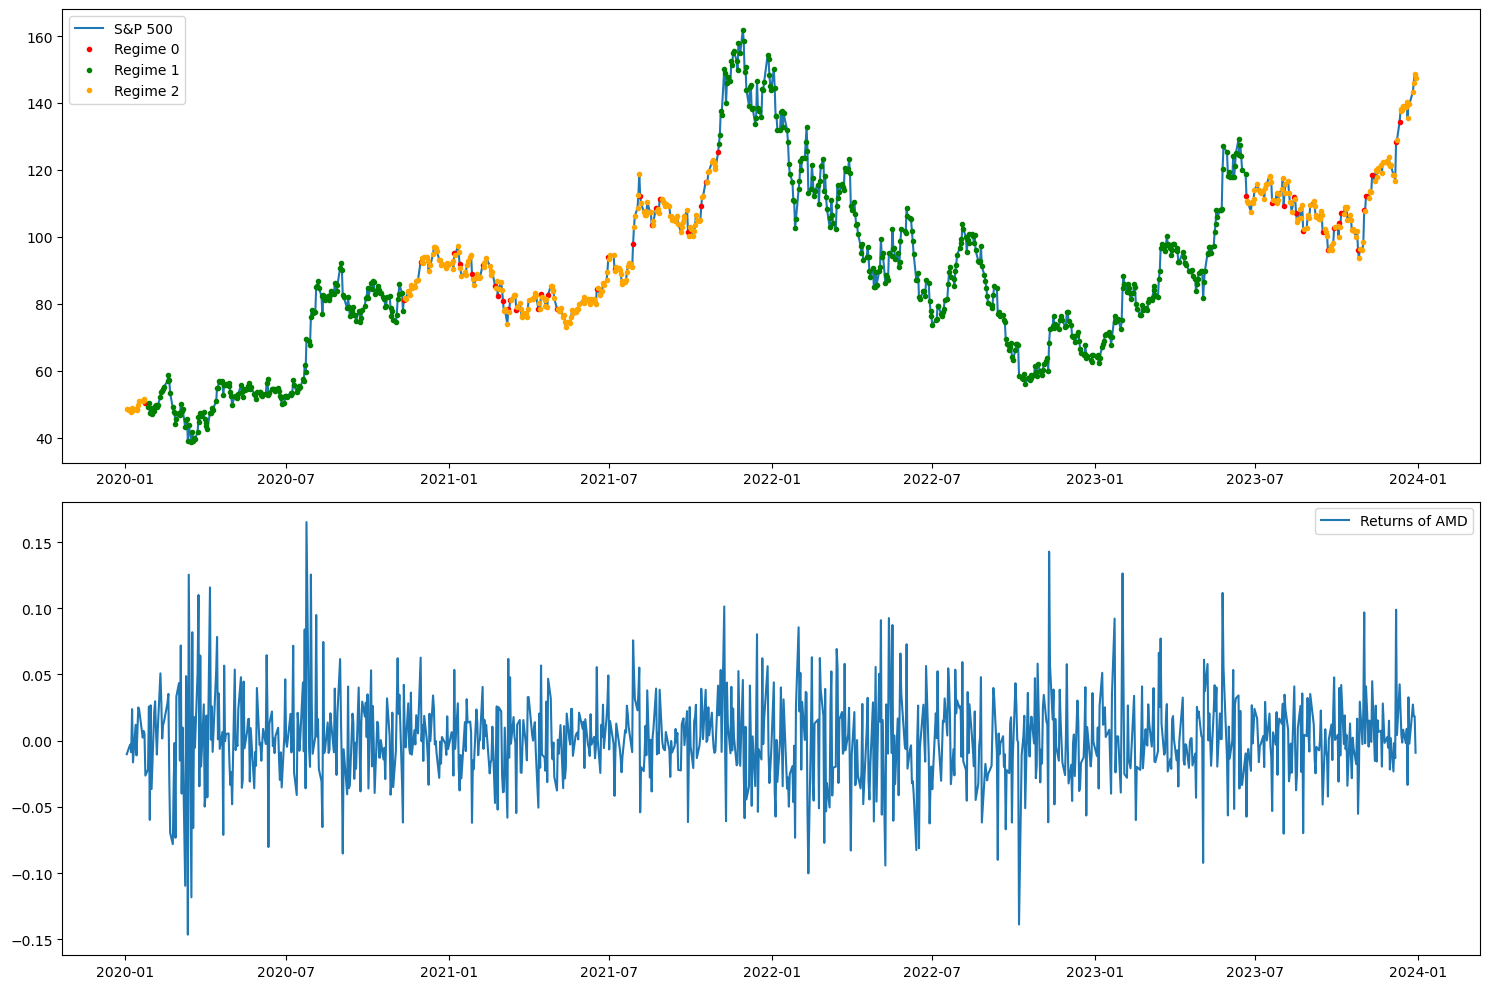

C:\Users\Asus\AppData\Local\Temp\ipykernel_27400\3767451941.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Returns'], bins=50, kde=True)
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


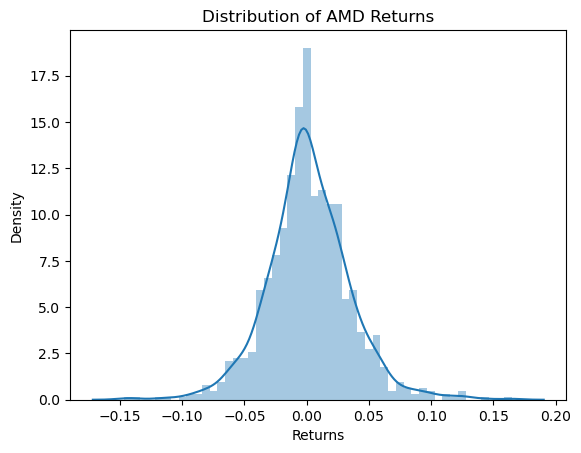

In [6]:
# Plot the actual S&P 500 chart

# plt.figure(figsize=(15, 10))
# plt.plot(data.index, data['Close'], label='S&P 500')

# # Color the regimes

# for i in range(model.n_components):
#     idx = (hidden_states == i)
#     plt.plot(data.index[idx], data['Close'][idx], '.', label=f'Regime {i}', color=colors[i])

# plt.legend()
# plt.show()

plat_regimes(asset_name, data=data, h_states=hidden_states, title='S&P 500', n_components=model.n_components, return_flag=True, dist_flag=True)

In [7]:
data['Close'].resample('W').last().to_frame()

,Close
Date,
2020-01-05,48.599998
2020-01-12,48.169998
2020-01-19,50.930000
2020-01-26,50.349998
2020-02-02,47.000000
...,...
2023-12-03,121.389999
2023-12-10,128.919998
2023-12-17,139.149994


In [8]:
# Resample the data to get weekly prices and calculate weekly returns
weekly_data = data['Close'].resample('W').last().to_frame()
weekly_data.head()
weekly_data['Returns'] = weekly_data['Close'].pct_change()
weekly_data.dropna(inplace=True)
print(' weekly data type: {}, size:{} '.format(type(weekly_data), weekly_data.shape))
print(weekly_data.head())
# Extract the returns as a NumPy array
w_returns = weekly_data['Returns'].values
print('type of returns: {}, size: {}'.format(type(w_returns), w_returns.shape))

# Standardize the returns
scaler = StandardScaler()
w_returns = scaler.fit_transform(w_returns.reshape(-1, 1))

# Create and train the Hidden Markov Model
wk_model = hmm.GaussianHMM(n_components=n_sects, covariance_type="full", n_iter=100)
wk_model.fit(returns)

# Predict the hidden states (regimes)
w_hidden_states = wk_model.predict(w_returns)
print('type of hidden_states: {}, size: {}'.format(type(w_hidden_states), w_hidden_states.shape))


C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


 weekly data type: <class 'pandas.core.frame.DataFrame'>, size:(208, 2) 
                Close   Returns
Date                           
2020-01-12  48.169998 -0.008848
2020-01-19  50.930000  0.057297
2020-01-26  50.349998 -0.011388
2020-02-02  47.000000 -0.066534
2020-02-09  49.730000  0.058085
type of returns: <class 'numpy.ndarray'>, size: (208,)
type of hidden_states: <class 'numpy.ndarray'>, size: (208,)


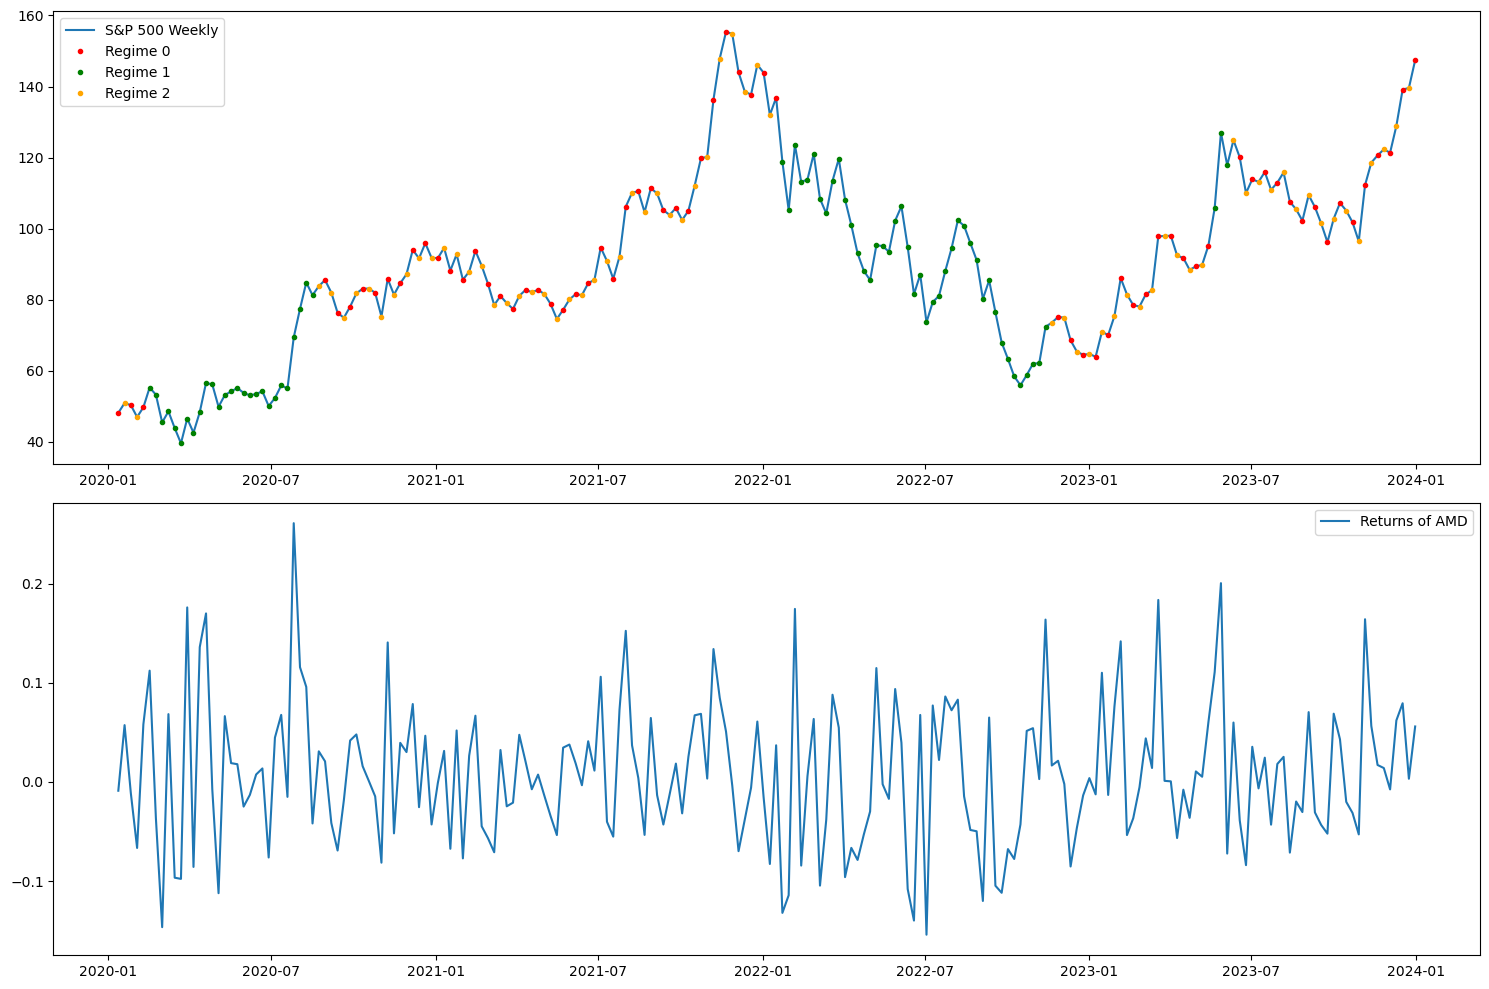

C:\Users\Asus\AppData\Local\Temp\ipykernel_27400\3767451941.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Returns'], bins=50, kde=True)
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


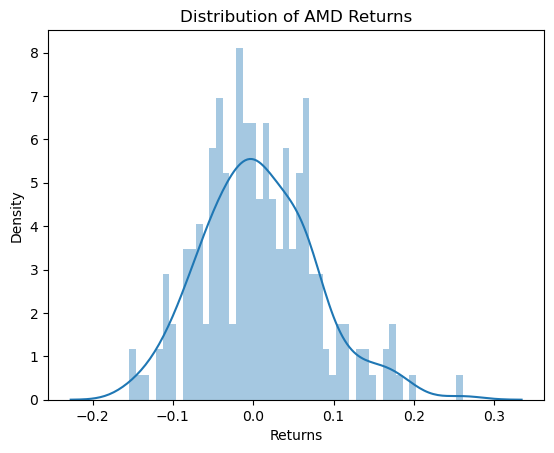

In [9]:
# Plot the actual S&P 500 chart

# plt.figure(figsize=(15, 10))
# plt.plot(weekly_data.index, weekly_data['Close'], label='S&P 500 - Weekly')

# # Color the regimes
# print(wk_model.n_components)

# for i in range(wk_model.n_components):
#     idx = (w_hidden_states == i)
#     # print('i is {}: {}'.format(i, idx))
#     plt.plot(weekly_data.index[idx], weekly_data['Close'][idx], '.', label=f'Regime {i}', color=colors[i])

# plt.legend()
# plt.show()

plat_regimes(asset_name, data=weekly_data, h_states=w_hidden_states, title='S&P 500 Weekly', 
             n_components=wk_model.n_components, dist_flag=True, return_flag=True)